# Initialize

In [21]:
%load_ext autoreload
%autoreload 2

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

import torch
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn

import sys
sys.path.append('/Users/enricofrausin/Programmazione/PythonProjects/Tesi/Autoencoders')

from AE.models import AE_0
from AE.datasets import MNISTDigit2Dataset, MNISTDigit2OnlyDataset, FEMNISTDataset

from AE.overlaps import compute_all_decoded_features_dist_over_repetitions, compute_all_decoded_features_distances_without_repetitions

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Utilizzo Apple Silicon GPU (MPS)")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Utilizzo NVIDIA GPU (CUDA)")
else:
    device = torch.device("cpu")
    print("Utilizzo la CPU")

device = torch.device("cpu")  # Fallback to CPU if no GPU is available

SEED = 42
torch.manual_seed(SEED)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Utilizzo Apple Silicon GPU (MPS)



# Datasets


In [2]:

batch_size = 64

## MNIST
train_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )



## ExtendedMNIST

train_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )


## 2MNIST

dataset_2MNIST_train = MNISTDigit2Dataset(train=True, download=True, target_size=60000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
train_loader_2MNIST = DataLoader(dataset_2MNIST_train, batch_size=batch_size, shuffle=True)

batch_images, batch_labels = next(iter(train_loader_2MNIST))
print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")

print("\n––––––––––––––––––––––––––––––––––––––––––––––––––––––\n")

dataset_2MNIST_val = MNISTDigit2Dataset(train=False, download=True, target_size=10000)
print(f"Dataset size: {len(dataset_2MNIST_train)}")
print(f"Image shape: {dataset_2MNIST_train[0][0].shape}")
print(f"Label: {dataset_2MNIST_train[0][1]}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")
val_loader_2MNIST = DataLoader(dataset_2MNIST_val, batch_size=batch_size, shuffle=True)

print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"All labels are 2: {torch.all(batch_labels == 2)}")




#-------------------------------------------------------------------


datasets = ["MNIST", "EMNIST", "2MNIST"]
train_loaders = {
    "MNIST": train_loader_MNIST,
    "EMNIST": train_loader_EMNIST,
    "2MNIST": train_loader_2MNIST
}
val_loaders = {
    "MNIST": val_loader_MNIST,
    "EMNIST": val_loader_EMNIST,
    "2MNIST": val_loader_2MNIST
}

Found 5958 original samples of digit '2'
Generated 60000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True

––––––––––––––––––––––––––––––––––––––––––––––––––––––

Found 1032 original samples of digit '2'
Generated 10000 augmented samples
Dataset size: 60000
Image shape: torch.Size([1, 28, 28])
Label: 2
All labels are 2: True
Batch images shape: torch.Size([64, 1, 28, 28])
Batch labels shape: torch.Size([64])
All labels are 2: True


In [ ]:

batch_size = 64


train_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_MNIST = torch.utils.data.DataLoader(
    datasets.MNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )



train_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_EMNIST = torch.utils.data.DataLoader(
    datasets.EMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        split='balanced',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )




dataset_2MNISTonly_train = MNISTDigit2OnlyDataset(train=True, download=True)
train_loader_2MNISTonly = DataLoader(dataset_2MNISTonly_train, batch_size=batch_size, shuffle=True)

dataset_2MNISTonly_val = MNISTDigit2OnlyDataset(train=False, download=True)
val_loader_2MNISTonly = DataLoader(dataset_2MNISTonly_val, batch_size=batch_size, shuffle=True)




datasets = ["MNIST", "EMNIST", "2MNISTonly"]
train_loaders = {
    "MNIST": train_loader_MNIST,
    "EMNIST": train_loader_EMNIST,
    "2MNISTonly": train_loader_2MNISTonly
}
val_loaders = {
    "MNIST": val_loader_MNIST,
    "EMNIST": val_loader_EMNIST,
    "2MNISTonly": val_loader_2MNISTonly
}


In [ ]:


dataset_FEMNIST_train = FEMNISTDataset(train=True, download=True)
train_loader_FEMNIST = DataLoader(dataset_FEMNIST_train, batch_size=batch_size, shuffle=True)
dataset_FEMNIST_val = FEMNISTDataset(train=False, download=True)
val_loader_FEMNIST = DataLoader(dataset_FEMNIST_val, batch_size=batch_size, shuffle=True)


train_loaders["FEMNIST"] = train_loader_FEMNIST
val_loaders["FEMNIST"] = val_loader_FEMNIST
print(len(train_loader_FEMNIST.dataset))


## FashionMNIST

In [ ]:

train_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=True,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=True
    )

val_loader_FashionMNIST = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        '/Users/enricofrausin/Programmazione/PythonProjects/Fisica/data',
        train=False,
        download=True,
        transform=transforms.ToTensor()
        ),
    batch_size=batch_size,
    shuffle=False
    )



# Analysis

In [51]:
datasets = ("2MNIST", "MNIST", "EMNIST")

def compute_overlap_matrix(datasets, model_path_kwargs, model_kwargs, repetitions=(0, 0)):

    distances_mean_matrix = np.zeros((len(datasets), len(datasets)))
    distances_std_matrix = np.zeros((len(datasets), len(datasets)))

    for i, dataset_i in enumerate(datasets):
        for j, dataset_j in enumerate(datasets):
            
            # if dataset_i == dataset_j:
            #     continue

            dataset_pair = (dataset_i, dataset_j)

            distances = compute_all_decoded_features_distances_without_repetitions(
                    model_path_kwargs=model_path_kwargs,
                    model_kwargs=model_kwargs,
                    repetitions=repetitions,
                    datasets=dataset_pair
                )

            distances_mean = distances.mean()
            distances_std = distances.std()

            distances_mean_matrix[i, j] = distances_mean
            distances_std_matrix[i, j] = distances_std

    return distances_mean_matrix, distances_std_matrix


In [4]:
def compute_overlap_matrix_for_repetitions(datasets, model_path_kwargs, model_kwargs, repetitions):
    distances_mean_matrices = []
    distances_std_matrices = []

    for rep_i in repetitions:
        for rep_j in repetitions:

            distances_mean_matrix, distances_std_matrix = compute_overlap_matrix(datasets, model_path_kwargs, model_kwargs, repetitions=(rep_i, rep_j))
            distances_mean_matrices.append(distances_mean_matrix)
            distances_std_matrices.append(distances_std_matrix)

    mean_of_distances_means = np.mean(distances_mean_matrices, axis=0)
    mean_of_distances_stds = np.mean(distances_std_matrices, axis=0)


    return mean_of_distances_means, mean_of_distances_stds

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overlap_heatmap(overlap_matrix, dataset_names=None, title="Overlap Matrix Heatmap", cmap="magma", vmin=0, vmax=12, ax=None):
    if ax is None:
        ax = plt.gca()
    im = ax.imshow(overlap_matrix, interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax)
    plt.colorbar(im, ax=ax, label="Overlap Value")
    if dataset_names is not None:
        ax.set_xticks(np.arange(len(dataset_names)))
        ax.set_xticklabels(dataset_names, rotation=45)
        ax.set_yticks(np.arange(len(dataset_names)))
        ax.set_yticklabels(dataset_names)
    ax.set_title(title)
    ax.set_xlabel("Dataset")
    ax.set_ylabel("Dataset")
    plt.tight_layout()

In [64]:
from AE.plotter_functions import save_fig

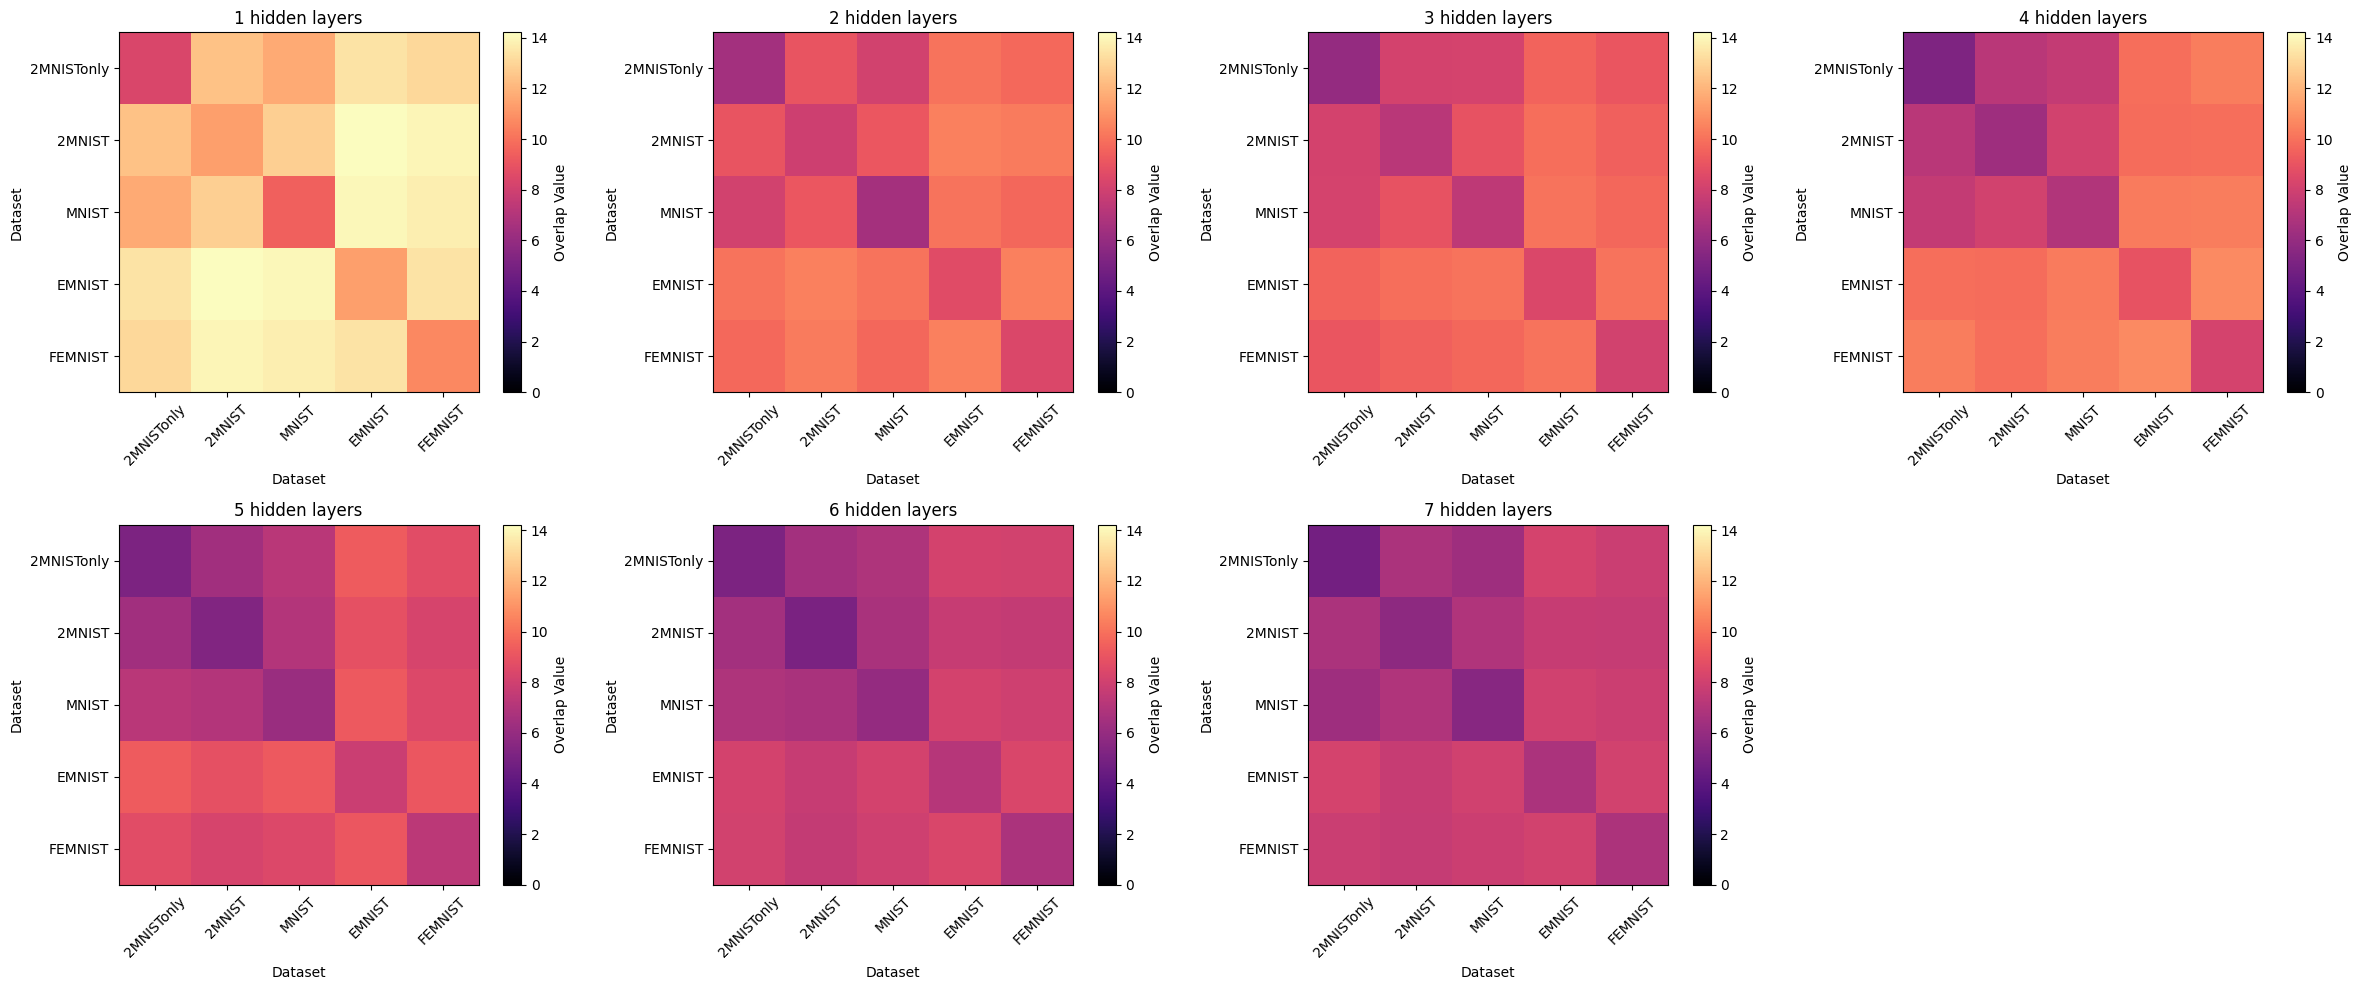

In [65]:
ld = 10

model_kwargs = {
    'input_dim': 28*28,
    'latent_dim': ld,
    'decrease_rate': 0.6,
    'device': device,
    'output_activation_encoder': nn.Sigmoid
}
model_path_kwargs = {
    'output_activation_encoder': 'sigmoid output',
    'train_type': 'simultaneous train',
    'latent_dim': f"{model_kwargs['latent_dim']}ld",
    'decrease_rate': '06',
    'learning_rate': '1e3',
    'train_num': 0,
}

datasets = ("2MNISTonly", "2MNIST", "MNIST", "EMNIST", "FEMNIST")

fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # 2 rows, 4 columns

vmax = None

mean_of_distances_means_dict = {}
mean_of_distances_stds_dict = {}

for i, num_hidden_layers in enumerate(range(1, 8)):
    row = i // 4
    col = i % 4
    model_kwargs['hidden_layers'] = num_hidden_layers
    model_path_kwargs['num_hidden_layers'] = num_hidden_layers
    mean_of_distances_means, mean_of_distances_stds = compute_overlap_matrix_for_repetitions(
        datasets, model_path_kwargs, model_kwargs, repetitions=range(6)
    )
    mean_of_distances_means_dict[num_hidden_layers] = mean_of_distances_means
    mean_of_distances_stds_dict[num_hidden_layers] = mean_of_distances_stds
    if i == 0:
        vmax = np.max(mean_of_distances_means)
    plot_overlap_heatmap(mean_of_distances_means, datasets, title=f"{num_hidden_layers} hidden layers", ax=axes[row, col], vmax=vmax)

axes[1, 3].axis('off')

plt.tight_layout()

plt.savefig(f"../preliminary data/overlaps/images/overlap_matrices_{ld}ld.png")
plt.show()


with open(f"../preliminary data/overlaps/overlaps_{ld}ld.txt", "w") as f:
    for di in range(len(datasets)):
        for dj in range(len(datasets)):
            f.write(f"{datasets[di]} to {datasets[dj]} \n")
            for num_hidden_layers in range(1, 8):
                f.write(f"d({num_hidden_layers}) = {mean_of_distances_means_dict[num_hidden_layers][di, dj]:.4f} \n")
                f.write(f"std({num_hidden_layers}) = {mean_of_distances_stds_dict[num_hidden_layers][di, dj]:.4f} \n")
            f.write("\n")

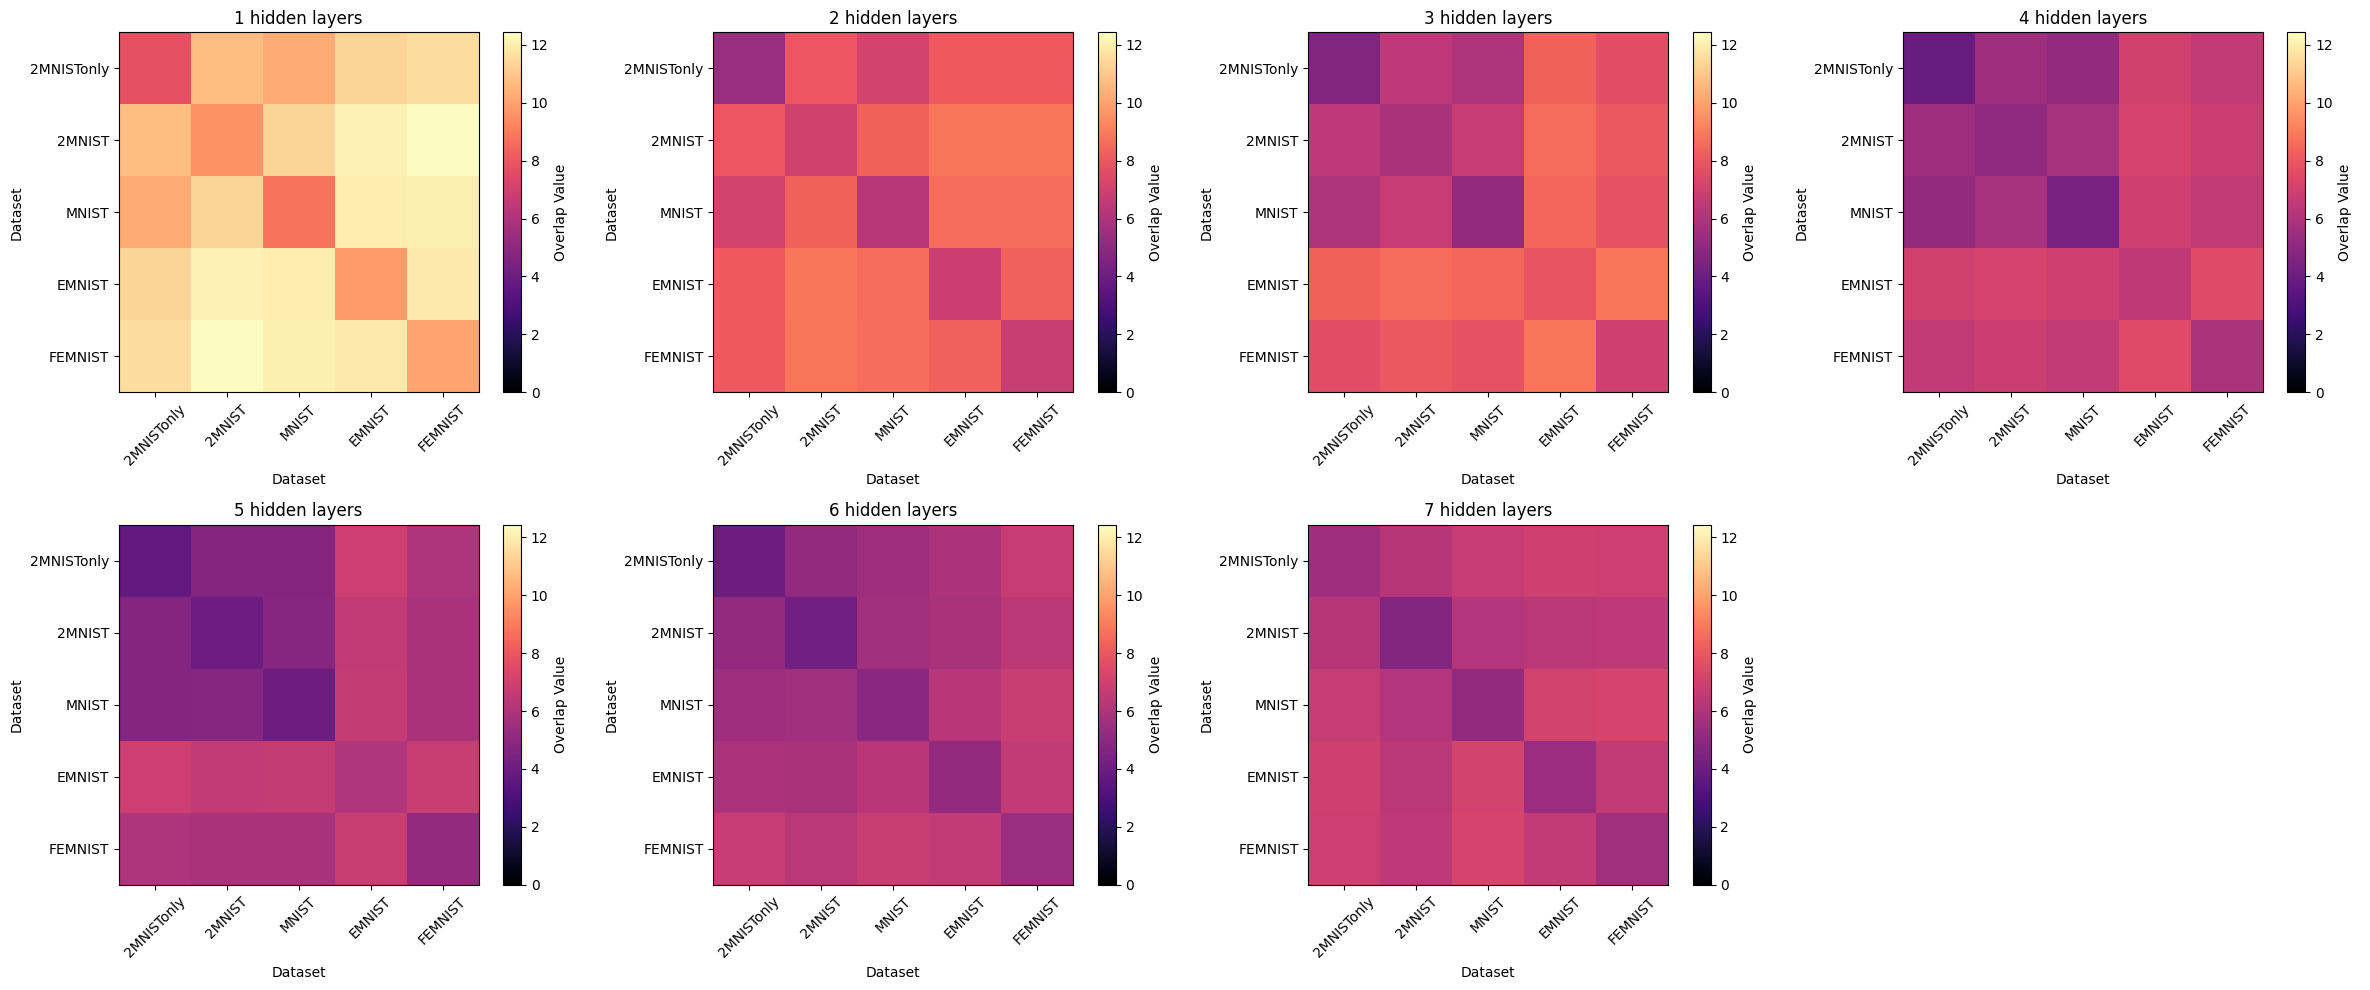

In [67]:
ld = 14

model_kwargs = {
    'input_dim': 28*28,
    'latent_dim': ld,
    'decrease_rate': 0.6,
    'device': device,
    'output_activation_encoder': nn.Sigmoid
}
model_path_kwargs = {
    'output_activation_encoder': 'sigmoid output',
    'train_type': 'simultaneous train',
    'latent_dim': f"{model_kwargs['latent_dim']}ld",
    'decrease_rate': '06',
    'learning_rate': '1e3',
    'train_num': 0,
}

datasets = ("2MNISTonly", "2MNIST", "MNIST", "EMNIST", "FEMNIST")

fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # 2 rows, 4 columns

vmax = None

mean_of_distances_means_dict = {}
mean_of_distances_stds_dict = {}

for i, num_hidden_layers in enumerate(range(1, 8)):
    row = i // 4
    col = i % 4
    model_kwargs['hidden_layers'] = num_hidden_layers
    model_path_kwargs['num_hidden_layers'] = num_hidden_layers
    mean_of_distances_means, mean_of_distances_stds = compute_overlap_matrix_for_repetitions(
        datasets, model_path_kwargs, model_kwargs, repetitions=range(6)
    )
    mean_of_distances_means_dict[num_hidden_layers] = mean_of_distances_means
    mean_of_distances_stds_dict[num_hidden_layers] = mean_of_distances_stds
    if i == 0:
        vmax = np.max(mean_of_distances_means)
    plot_overlap_heatmap(mean_of_distances_means, datasets, title=f"{num_hidden_layers} hidden layers", ax=axes[row, col], vmax=vmax)

axes[1, 3].axis('off')

plt.tight_layout()

plt.savefig(f"../preliminary data/overlaps/images/overlap_matrices_{ld}ld.png")
plt.show()


with open(f"../preliminary data/overlaps/overlaps_{ld}ld.txt", "w") as f:
    for di in range(len(datasets)):
        for dj in range(len(datasets)):
            f.write(f"{datasets[di]} to {datasets[dj]} \n")
            for num_hidden_layers in range(1, 8):
                f.write(f"d({num_hidden_layers}) = {mean_of_distances_means_dict[num_hidden_layers][di, dj]:.4f} \n")
                f.write(f"std({num_hidden_layers}) = {mean_of_distances_stds_dict[num_hidden_layers][di, dj]:.4f} \n")
            f.write("\n")

In [ ]:
from AE.plotter_functions import visualize_bottleneck_neurons
from AE.overlaps import 